# **ETC**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [ ]:
from google.colab import drive
# Please mount your drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Time Series**

0
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Name: 1, Length: 144, dtype: int64


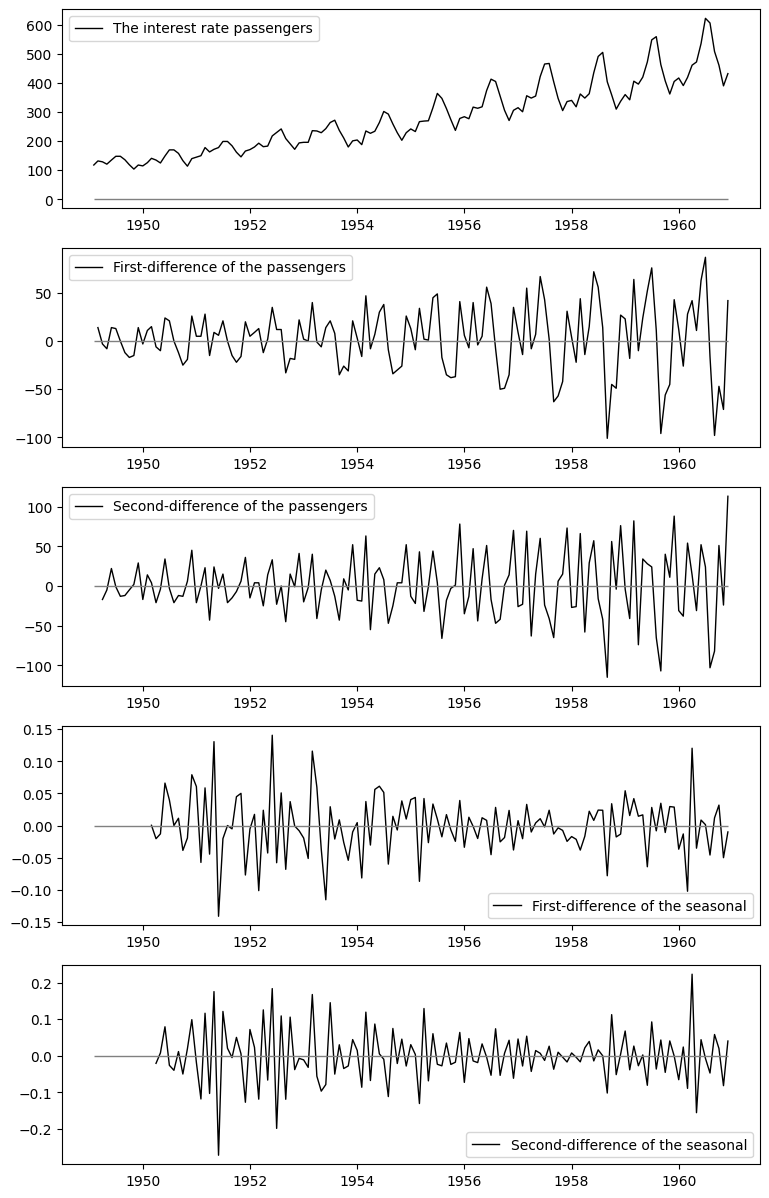

In [ ]:
monthly = pd.read_csv('/content/drive/MyDrive/ARMA/AirPassengers.csv', header=None, index_col=[0])

passengers=monthly[1]
print(passengers)
passengers.index= pd.to_datetime(passengers.index)

passengers = passengers[1:]


f, axes = plt.subplots(nrows=5, ncols=1, figsize=(9, 3*5))
axes[0].plot(passengers,color='black',linewidth=1,label='The interest rate passengers')
axes[0].hlines(xmin=passengers.index[0],xmax=passengers.index[-1],y=0,color='gray',linewidth=1)
axes[0].legend()
#원본.

axes[1].plot(passengers.diff(),color='black',linewidth=1,label='First-difference of the passengers')
axes[1].hlines(xmin=passengers.index[0],xmax=passengers.index[-1],y=0,color='gray',linewidth=1)
axes[1].legend()
#1차 차분.

axes[2].plot(passengers.diff().diff(),color='black',linewidth=1,label='Second-difference of the passengers')
axes[2].hlines(xmin=passengers.index[0],xmax=passengers.index[-1],y=0,color='gray',linewidth=1)
axes[2].legend()
#2차 차분.

axes[3].plot(np.log(passengers/passengers.shift(12)).diff().dropna(),color='black',linewidth=1,label='First-difference of the seasonal')
axes[3].hlines(xmin=passengers.index[0],xmax=passengers.index[-1],y=0,color='gray',linewidth=1)
axes[3].legend()
#계절성 제거 후 1차 차분.

axes[4].plot(np.log(passengers/passengers.shift(12)).diff().diff().dropna(),color='black',linewidth=1,label='Second-difference of the seasonal')
axes[4].hlines(xmin=passengers.index[0],xmax=passengers.index[-1],y=0,color='gray',linewidth=1)
axes[4].legend()
#계절성 제거 후 1차 차분..


plt.show()
#원래 것이 stationary인데 미분하면 non-stationary가 되는 경우가 있음.

# **ADF/KPSS TEST**

In [ ]:
def adf_test(dataframe):
    result = adfuller(dataframe)
    print(f'Statistics: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical values: {result[4]}')

#함수 형태로 만들어서 쓰는 것 익숙해지기.
#p-value가 매우작음. ADF test.

adf_test(passengers)
print('---'*40)
adf_test(passengers.diff().dropna())
print('---'*40)
adf_test(passengers.diff().diff().dropna())
print('---'*40)
adf_test(np.log(passengers/passengers.shift(12)).diff().dropna())
print('---'*40)
adf_test(np.log(passengers/passengers.shift(12)).diff().diff().dropna())
print('---'*40)

Statistics: 0.7923399959692623
p-value: 0.991511509628866
Critical values: {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}
------------------------------------------------------------------------------------------------------------------------
Statistics: -2.83342564556533
p-value: 0.053655499158908174
Critical values: {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}
------------------------------------------------------------------------------------------------------------------------
Statistics: -16.313032556105693
p-value: 3.182121099054181e-29
Critical values: {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}
------------------------------------------------------------------------------------------------------------------------
Statistics: -4.549180148695245
p-value: 0.00016009049261959363
Critical values: {'1%': -3.487517288664615, '5%': -2.8865777180380032, '10%': -2.5801239192052012}


In [ ]:
def kpss_test(dataframe):
    result = kpss(dataframe)
    print(f'Statistics: {result[0]}')
    print(f'bounded p-value: {result[1]}')
    print(f'Critical values: {result[3]}')

kpss_test(passengers)
print('---'*40)
kpss_test(passengers.diff().dropna())
print('---'*40)
kpss_test(passengers.diff().diff().dropna())
print('---'*40)
kpss_test(np.log(passengers/passengers.shift(12)).diff().dropna())
print('---'*40)
kpss_test(np.log(passengers/passengers.shift(12)).diff().diff().dropna())
print('---'*40)

#ADF와 KPSS는 null hypothesis가 반대임.
#결과 보고 해석할 수 있어야 함.

Statistics: 1.638609802673602
bounded p-value: 0.01
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
------------------------------------------------------------------------------------------------------------------------
Statistics: 0.02419382862398609
bounded p-value: 0.1
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
------------------------------------------------------------------------------------------------------------------------
Statistics: 0.14537083858266814
bounded p-value: 0.1
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
------------------------------------------------------------------------------------------------------------------------
Statistics: 0.05110206356609082
bounded p-value: 0.1
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
------------------------------------------------------------------------------------------------------------------------
Statistics: 0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the 

1. 원본 시계열은 Non-Stationary.
2. 1차 차분 시계열은 ADF의 귀무가설을 기각하지 못한다.
3. 2차 차분 시계열은 Stationary.
4. 계절성을 제거한 1차 차분 시계열은 Stationary.
5. 계절성을 제거한 2차 차분 시계열은 Stationary.

# **ACF/PACF**

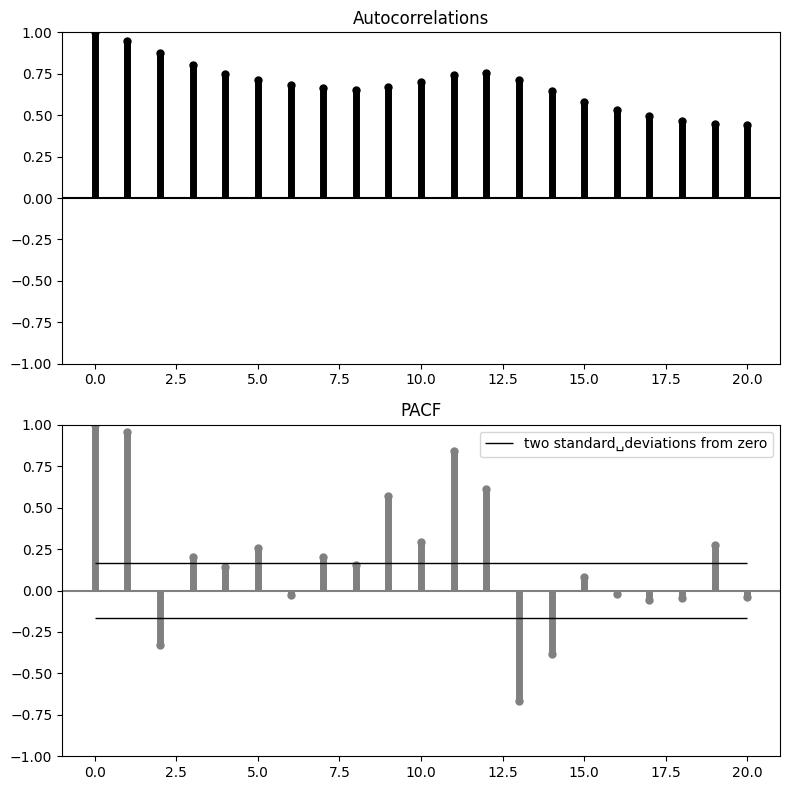

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 2*4))

plot_acf(passengers, lags=20, ax=axes[0], title='Autocorrelations', color='black',vlines_kwargs={'colors':'black','linewidth':5}, alpha=None)
plot_pacf(passengers, lags=20, ax=axes[1], method='ols', title='PACF', color='gray',vlines_kwargs={'colors':'gray','linewidth':5}, alpha=None)
#draw ACF and PACF
#PACF의 첫째는 무시.
#1st lag에 큰 영향을 받음을 알 수 있음. it is AR(1) model.
#ACF가 기하급수적으로 감소하지 않고 선형이기 때문에 MA doesn't exist.
#ACF의 음수 부분은 is not important.

axes[1].hlines(xmin=0,xmax=20,y=2*np.sqrt(1/len(passengers)),label='two standard␣deviations from zero',color='black',linewidth=1)
axes[1].hlines(xmin=0,xmax=20,y=-2*np.sqrt(1/len(passengers)),color='black',linewidth=1)
axes[1].legend()

plt.tight_layout()
plt.show()

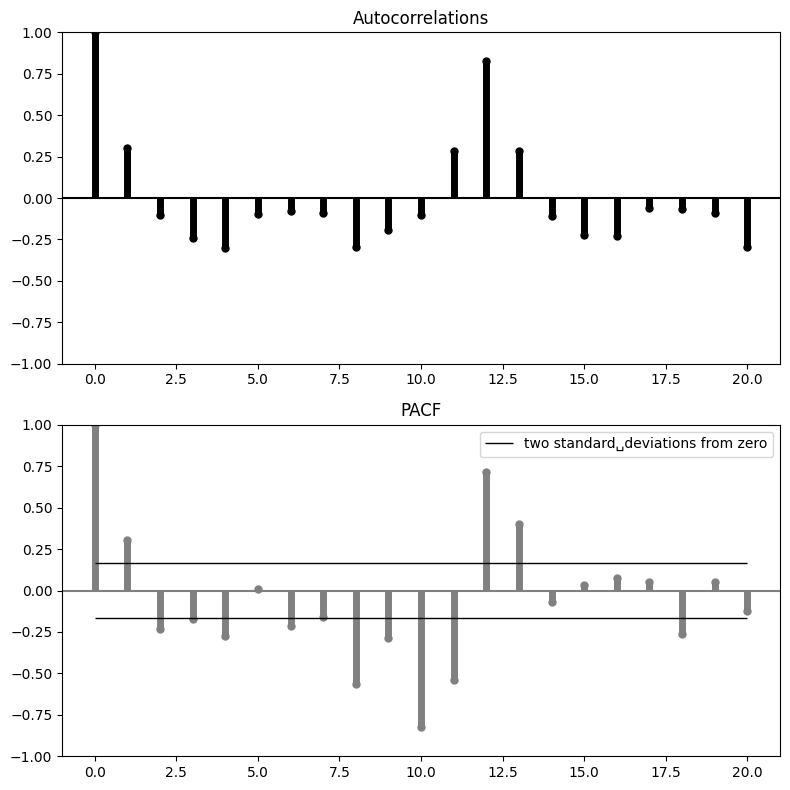

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 2*4))

plot_acf(passengers.diff().dropna(), lags=20, ax=axes[0], title='Autocorrelations', color='black',vlines_kwargs={'colors':'black','linewidth':5}, alpha=None)
plot_pacf(passengers.diff().dropna(), lags=20, ax=axes[1], method='ols', title='PACF', color='gray',vlines_kwargs={'colors':'gray','linewidth':5}, alpha=None)
#draw ACF and PACF
#PACF의 첫째는 무시.
#1st lag에 큰 영향을 받음을 알 수 있음. it is AR(1) model.
#ACF가 기하급수적으로 감소하지 않고 선형이기 때문에 MA doesn't exist.
#ACF의 음수 부분은 is not important.

axes[1].hlines(xmin=0,xmax=20,y=2*np.sqrt(1/len(passengers)),label='two standard␣deviations from zero',color='black',linewidth=1)
axes[1].hlines(xmin=0,xmax=20,y=-2*np.sqrt(1/len(passengers)),color='black',linewidth=1)
axes[1].legend()

plt.tight_layout()
plt.show()

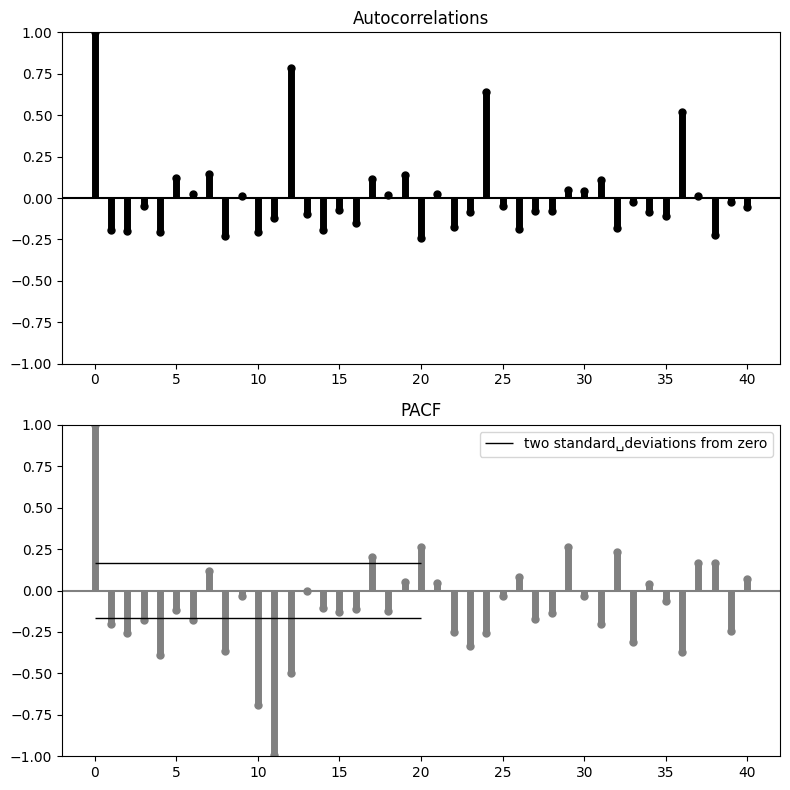

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 2*4))

plot_acf(passengers.diff().diff().dropna(), lags=40, ax=axes[0], title='Autocorrelations', color='black',vlines_kwargs={'colors':'black','linewidth':5}, alpha=None)
plot_pacf(passengers.diff().diff().dropna(), lags=40, ax=axes[1], method='ols', title='PACF', color='gray',vlines_kwargs={'colors':'gray','linewidth':5}, alpha=None)
#draw ACF and PACF
#PACF의 첫째는 무시.
#1st lag에 큰 영향을 받음을 알 수 있음. it is AR(1) model.
#ACF가 기하급수적으로 감소하지 않고 선형이기 때문에 MA doesn't exist.
#ACF의 음수 부분은 is not important.

axes[1].hlines(xmin=0,xmax=20,y=2*np.sqrt(1/len(passengers)),label='two standard␣deviations from zero',color='black',linewidth=1)
axes[1].hlines(xmin=0,xmax=20,y=-2*np.sqrt(1/len(passengers)),color='black',linewidth=1)
axes[1].legend()

plt.tight_layout()
plt.show()

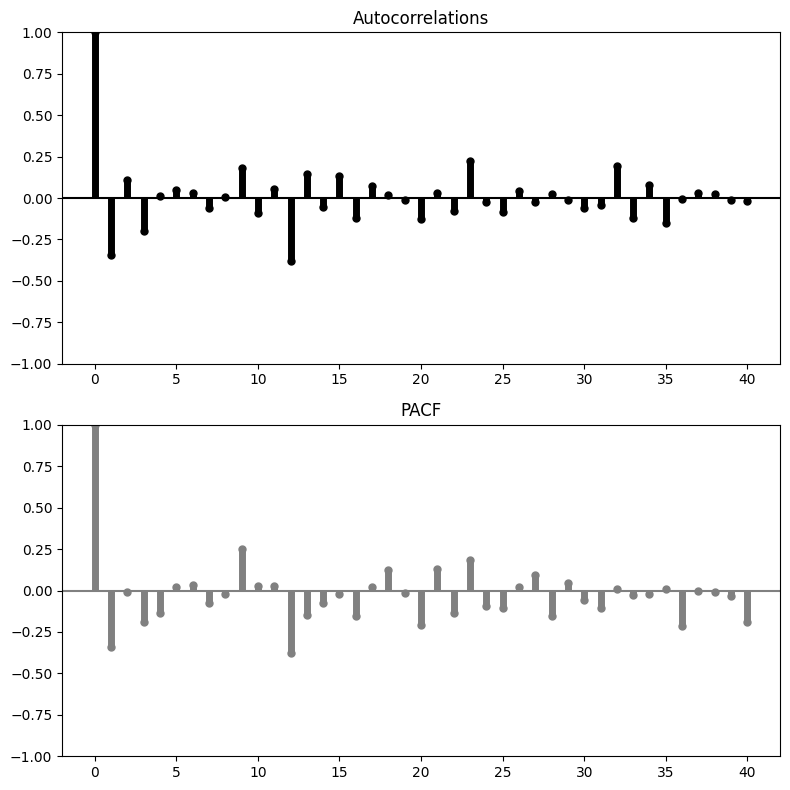

In [ ]:
passengers_seasonal_difference = np.log(passengers/passengers.shift(12)).diff().dropna()
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 2*4))
plot_acf(passengers_seasonal_difference, lags=40, ax=axes[0], title='Autocorrelations',color='black',vlines_kwargs={'colors':'black','linewidth':5}, alpha=None)
plot_pacf(passengers_seasonal_difference, lags=40, ax=axes[1], method='ols',title='PACF', color='gray',vlines_kwargs={'colors':'gray','linewidth':5},alpha=None)
plt.tight_layout()
plt.show()

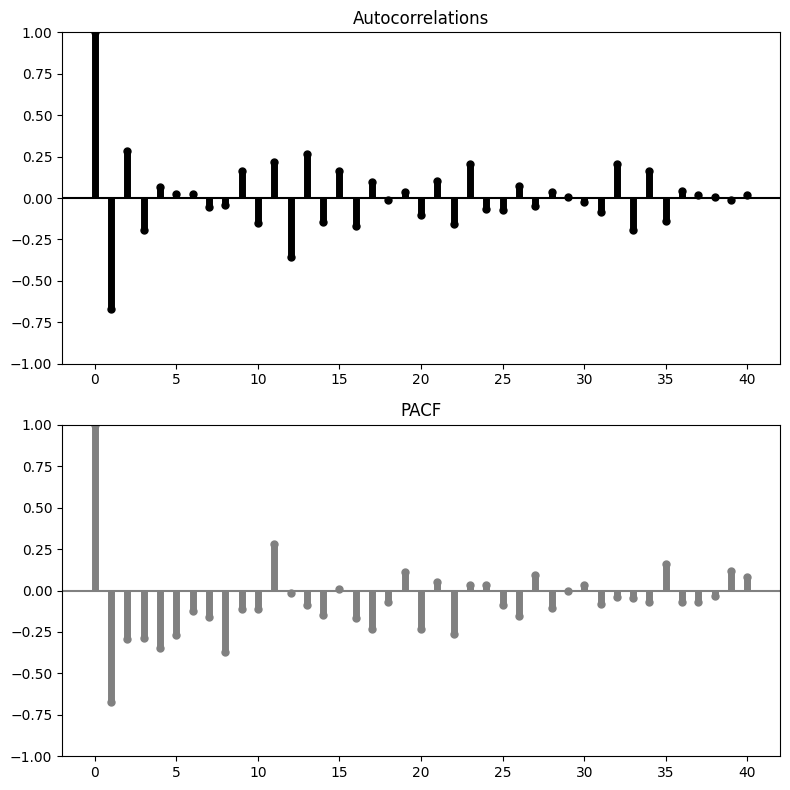

In [ ]:
passengers_seasonal_difference = np.log(passengers/passengers.shift(12)).diff().diff().dropna()
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 2*4))
plot_acf(passengers_seasonal_difference, lags=40, ax=axes[0], title='Autocorrelations',color='black',vlines_kwargs={'colors':'black','linewidth':5}, alpha=None)
plot_pacf(passengers_seasonal_difference, lags=40, ax=axes[1], method='ols',title='PACF', color='gray',vlines_kwargs={'colors':'gray','linewidth':5},alpha=None)
plt.tight_layout()
plt.show()


In [ ]:
# Define a function to get the maximum value(s) from an element in the set
def get_max_value(element):
    if isinstance(element, int) or isinstance(element, float):
        return element
    else:
        return max(element)

#p에 대한 값은 6,7,8<-ACF가 음수가 되는 예상지점.
#table보고 candiatate 정의 스스로 해보기.

# **Second_Differencial Time Series**

In [ ]:
lag_list = [(list(range(1,13)), 0, 0),(list(range(1,13)),0,[4,8,12]),(0,0,[4,8,12])]
# AR(12), ARMA(12,[4,8,12]), MA([4,8,12])
# 주기가 12이므로 AR(12)선정.
# 오차가 가장 큰 MA선정.

summary_table = dict()
idx=0
num_of_obs = len(passengers.diff().diff()[12:])
for lag in lag_list:# SSE i.e SSR, AIC, SBC, Ljung–Box Q-statistics of the residual␣autocorrelations for lag:={4, 8, 12}.
    temp_perf_dict = {key: key for key in['SSE','AIC','SBC','Q(4)','Q(8)','Q(12)']}

# Get the maximum value(s) from each element in the set
    max_values = [get_max_value(elem) for elem in lag]
    max_element = max(max_values)



# We use spread[7-max_element:] to estimate each equation over the 1961Q4-2012Q4.
    res = ARIMA(endog = passengers.diff().diff().dropna()[12-max_element:], order=lag, trend='c').fit(method='innovations_mle')

# We use spread[7-max_element:] to estimate each equation over the␣1961Q4-2012Q4.
#    res = ARIMA(endog = passengers[12-max_element:], order=lag, trend='c').fit(method='innovations_mle')
#SARIMA모델써서 계절성 고려해야 함.


# Use Durbin–Levinson algorithm. You can also␣use other estimation method.
    temp_perf_dict['SSE'] = round(res.sse,2)

# Note that since we assume the model errors are IID according to a normaldistribution, the BIC and AIC formula is bit different from a general form.
    temp_perf_dict['AIC'] = round(num_of_obs*np.log(res.sse) + 2*len(res.params),2)
    temp_perf_dict['SBC'] = round(num_of_obs*np.log(res.sse) + len(res.params)*np.log(num_of_obs),2)

# Lijung-box Q-statistics for lag 4,8,12
    q_statistics = res.test_serial_correlation(method='ljungbox',lags=12)[0]
    temp_perf_dict['Q(4)'] = {'q_stats' : round(q_statistics[0][3],2), 'p_val':round(q_statistics[1][3],2)}
    temp_perf_dict['Q(8)'] = {'q_stats' : round(q_statistics[0][7],2), 'p_val':round(q_statistics[1][7],2)}
    temp_perf_dict['Q(12)'] = {'q_stats' : round(q_statistics[0][11],2),'p_val': round(q_statistics[1][11],2)}

    for param_name, param in zip(res.params.index, res.params):
        temp_perf_dict[param_name] = {'coef':round(param,2), 't_stats':round(res.tvalues[param_name],2)}
    hashable_order = tuple([tuple(order) if isinstance(order,list) == True else order for order in res.specification['order']])
# make res.specification['order'] hashable.

    summary_table[hashable_order] = temp_perf_dict

#계속 반복적으로 씀.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [ ]:
table_2_4 = pd.DataFrame()
for key, value in summary_table.items():
    temp_series = pd.Series(value, name=key)
    table_2_4 = pd.concat([table_2_4,temp_series],axis=1)

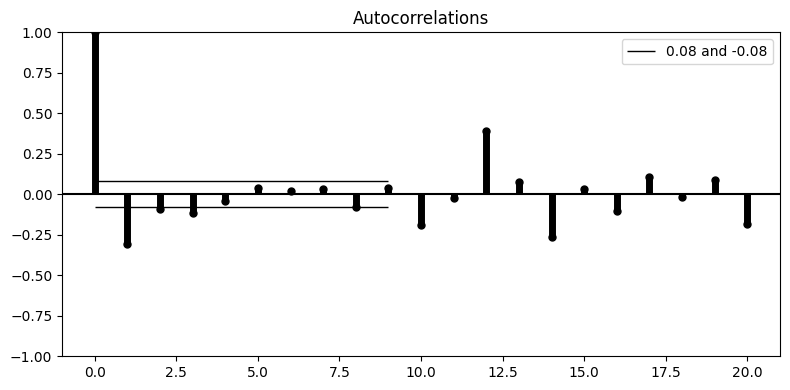

In [ ]:
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
# the ACF of the last model's residuals.
plot_acf(res.resid, lags=20, ax=axes, title='Autocorrelations',color='black',vlines_kwargs={'colors':'black','linewidth':5}, alpha=None)
axes.hlines(xmin=0,xmax=9,y=0.08,label='0.08 and -0.08',color='black',linewidth=1)
axes.hlines(xmin=0,xmax=9,y=-0.08,color='black',linewidth=1)
axes.legend()
plt.tight_layout()
plt.show()

In [ ]:
table_2_4.loc[['const','ar.L1','ar.L2','ar.L3','ar.L4','ar.L5','ar.L6','ar.L7','ar.L8','ar.L9','ar.L10','ar.L11','ar.L12','ma.L4','ma.L8','ma.L12','SSE','AIC','SBC','Q(4)','Q(8)','Q(12)'],:]

# For ordering the row of the table.

,"(12, 0, 0)","(12, 0, (4, 8, 12))","(0, 0, (4, 8, 12))"
const,"{'coef': 0.01, 't_stats': 0.16}","{'coef': 0.02, 't_stats': 0.33}","{'coef': 1.53, 't_stats': 0.42}"
ar.L1,"{'coef': -1.26, 't_stats': -15.16}","{'coef': -1.28, 't_stats': -12.52}",NaN
ar.L2,"{'coef': -1.32, 't_stats': -15.78}","{'coef': -1.32, 't_stats': -13.34}",NaN
ar.L3,"{'coef': -1.28, 't_stats': -14.84}","{'coef': -1.31, 't_stats': -12.56}",NaN
ar.L4,"{'coef': -1.33, 't_stats': -15.69}","{'coef': -1.31, 't_stats': -12.86}",NaN
ar.L5,"{'coef': -1.25, 't_stats': -13.83}","{'coef': -1.27, 't_stats': -12.33}",NaN
ar.L6,"{'coef': -1.29, 't_stats': -15.81}","{'coef': -1.29, 't_stats': -13.43}",NaN
ar.L7,"{'coef': -1.25, 't_stats': -15.93}","{'coef': -1.26, 't_stats': -12.89}",NaN
ar.L8,"{'coef': -1.35, 't_stats': -17.4}","{'coef': -1.33, 't_stats': -14.77}",NaN
ar.L9,"{'coef': -1.26, 't_stats': -15.29}","{'coef': -1.28, 't_stats': -12.88}",NaN


In [ ]:
# out-of-sample prediction with expanding rolling window.
checker = passengers.diff().diff().dropna().index <= '1959-1'
#2004년 4월 1일 이후는 out of sample
#(list(range(1,13)), 0, 0),(list(range(1,13)),0,[4,8,12]),(0,0,[4,8,12])

train_set = passengers.diff().diff().dropna()[checker]
test_set = passengers.diff().diff().dropna()[~checker]
n_train = len(train_set)
n_test = len(test_set)
f1, f1_error = [], []
f2, f2_error = [], []
f3, f3_error = [], []
ground_truth = []

for i in range(n_test):
    crt_time = i + n_train
    x_train = passengers.diff().diff().dropna()[:crt_time]

# iterate over the time series data, fitting the model on each expanding␣ window of data
    model_1 = ARIMA(endog = x_train, order=(12,0,0), trend='c').fit(method='innovations_mle') # model 1
    model_2 = ARIMA(endog = x_train, order=(12,0,[4,8,12]), trend='c').fit(method='innovations_mle') # model 2
    model_3 = ARIMA(endog = x_train, order=(0,0,[4,8,12]), trend='c').fit(method='innovations_mle') # model 3

# one-step-ahead forecasts
    forecast_1 = model_1.forecast(steps=1)
    forecast_2 = model_2.forecast(steps=1)
    forecast_3 = model_3.forecast(steps=1)

# true one-step-ahead value
    y = passengers.diff().diff().dropna()[crt_time]
    ground_truth.append(y)
    f1.append(forecast_1[0])
    f1_error.append(y-forecast_1[0])
    f2.append(forecast_2[0])
    f2_error.append(y-forecast_2[0])
    f3.append(forecast_3[0])
    f3_error.append(y-forecast_3[0])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

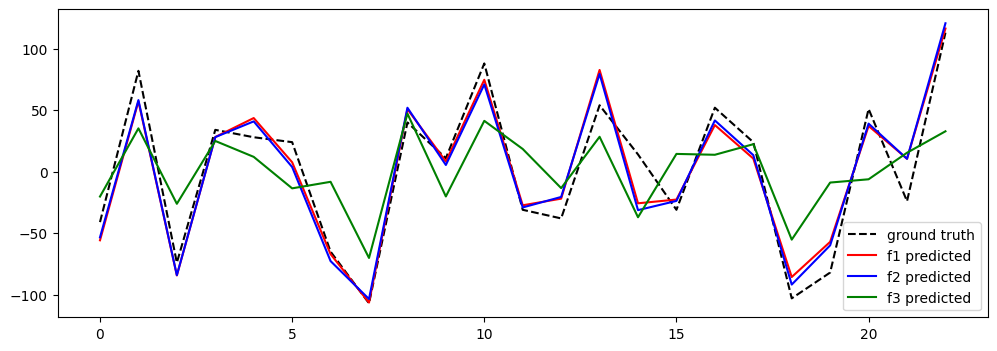

In [ ]:
 # plot the results
plt.figure(figsize=(12,4))
plt.plot(ground_truth, label='ground truth', color='k', linestyle='--')
plt.plot(f1, label='f1 predicted', color='r')
plt.plot(f2, label='f2 predicted', color='b')
plt.plot(f3, label='f3 predicted', color='g')
plt.legend()
plt.show()

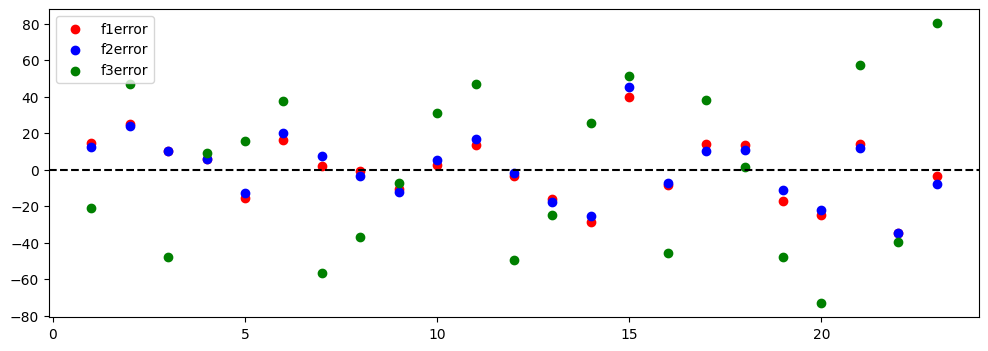

In [ ]:
 # plot the results
plt.figure(figsize=(12,4))
plt.scatter(np.linspace(1,len(f1_error),len(f1_error)), f1_error, label='f1error', color='r')
plt.scatter(np.linspace(1,len(f2_error),len(f2_error)), f2_error, label='f2error', color='b')
plt.scatter(np.linspace(1,len(f3_error),len(f3_error)), f3_error, label='f3error', color='g')
plt.axhline(y=0, color='k', linestyle='--')
plt.legend()
plt.show()

In [ ]:
s_2000_3q = ground_truth[0]
f1_2000_3q = f1[0]
f2_2000_3q = f2[0]
f3_2000_3q = f3[0]
f1 = pd.Series(f1)
f2 = pd.Series(f2)
f3 = pd.Series(f3)
f1_error = pd.Series(f1_error)
f2_error = pd.Series(f2_error)
f3_error = pd.Series(f3_error)
print(f"Actual value:{round(s_2000_3q,3)}, f1 forecast:{round(f1_2000_3q,3)},f2 forecast:{round(f2_2000_3q,3)},f3 forecast:{round(f3_2000_3q,3)}")
print(f"avg f1:{round(np.array(f1).mean(),4)}, avg f2:{round(np.array(f2).mean(),4)},avg f3:{round(np.array(f3).mean(),4)}")
print(f"var of f1:{round(np.array(f1).var(),4)}, var of f2:{round(np.array(f2).var(),4)},var of f3:{round(np.array(f3).var(),4)}")
print(f'mean squared prediction error of f1: {round((f1_error**2).mean(),4)},mean squared prediction error of f2: {round((f2_error**2).mean(),4)},,mean squared prediction error of f3: {round((f3_error**2).mean(),4)}')

Actual value:-41.0, f1 forecast:-55.789,f2 forecast:-53.393,f3 forecast:-20.221
avg f1:0.5169, avg f2:-0.264,avg f3:1.183
var of f1:3335.8602, var of f2:3426.5721,var of f3:898.4671
mean squared prediction error of f1: 314.1134,mean squared prediction error of f2: 315.0807,,mean squared prediction error of f3: 1876.911


3 model은 MSE가 큼으로 제외.

In [ ]:
# Joint f-test for model 1
dta = pd.concat([pd.Series(f1,name='f1'), pd.Series(ground_truth,name='s')],axis=1)
dta.columns=['f1','s']
formula = 's ~ f1'
results = sm.OLS.from_formula(formula = formula, data = dta).fit()
hypotheses = '(Intercept = 0), (f1 = 1)'
f_test = results.f_test(hypotheses)
print(f_test)
print(results.params)

<F test: F=0.004960967824723928, p=0.9950524832479511, df_denom=21, df_num=2>
Intercept    0.307147
f1           1.003976
dtype: float64


In [ ]:
# Joint f-test for model 2
dta = pd.concat([pd.Series(f2,name='f2'), pd.Series(ground_truth,name='s')],axis=1)
dta.columns=['f2','s']
formula = 's ~ f2'
results = sm.OLS.from_formula(formula = formula, data = dta).fit()
hypotheses = '(Intercept = 0), (f2 = 1)'
f_test = results.f_test(hypotheses)
print(f_test)
print(results.params)

<F test: F=0.049812792326074835, p=0.9515195871788277, df_denom=21, df_num=2>
Intercept    1.087628
f2           0.990652
dtype: float64


In [ ]:
x_i = f1_error + f2_error
z_i = f1_error - f2_error
corr_xz = x_i.corr(z_i,method='pearson')
Granger_Newbold_stats = corr_xz/ np.sqrt( (1-corr_xz**2)/49 )
print(Granger_Newbold_stats)

0.008106078825759021


In [ ]:
d = np.power(f1_error, 4) - np.power(f2_error, 4)
DM = np.mean(d) / np.power(np.var(d) / (len(d) - 1), 0.5)
print(DM)
acf_d = acf(d, nlags=12)[1:]
print(acf_d)

-0.6965066210703077
[-0.17084522 -0.0232419  -0.0376315  -0.04257932 -0.1116046  -0.02715477
 -0.04126149 -0.0404851   0.04794649 -0.03016525 -0.01238919 -0.00782234]


# **First_Differencial Time Series(Non-Seasonality)**

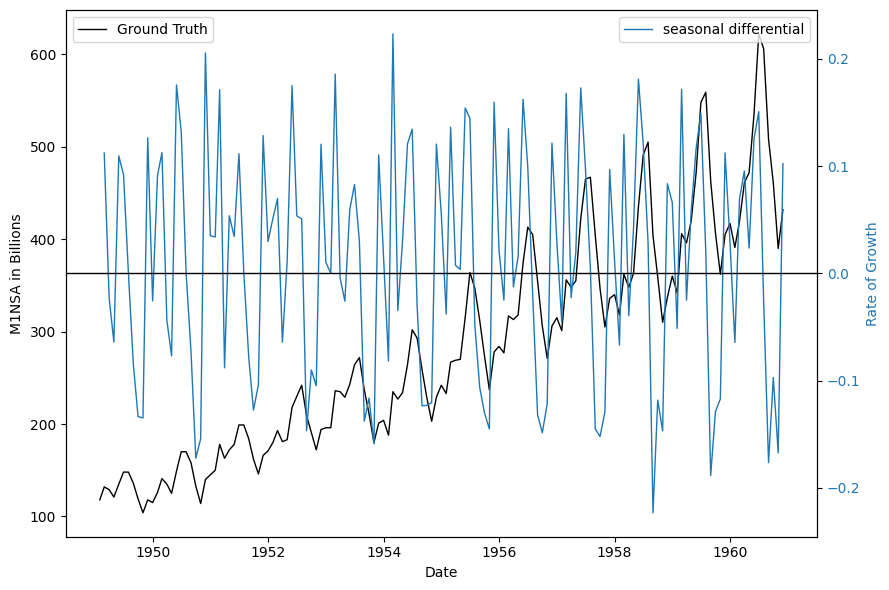

In [ ]:
 # Figure for M1
fig, ax1 = plt.subplots(figsize=(9, 6))
color = 'black'
ax1.set_xlabel('Date')
ax1.set_ylabel('M1NSA in Billions', color=color)
ax1.plot(passengers, color=color, linewidth=1, linestyle='-', label='Ground Truth')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
16
color = 'tab:blue'
passengers_seasonal_differenced = np.log(passengers/passengers.shift(12)).diff().dropna()
ax2.set_ylabel('Rate of Growth', color=color) # we already handled the x-labelwith ax1
ax2.plot(np.log(passengers/passengers.shift(1)), color=color, linewidth=1, label='seasonal differential')
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(y=0, color='black', linewidth=1)
ax2.legend(loc='upper right')
fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.show()


In [ ]:
# model_1: AR(4,4) with Seasonal AR term with lag 12
# model_2: Multiplicative Autoregressive
# model_3: Multiplicative Moving Average
# model_4: Multiplicative ARMA
# seasonality를 제거했음으로 AR(1), MA(1), ARMA(1,1)선정.
model_1 = sm.tsa.statespace.SARIMAX(passengers_seasonal_differenced, trend='c',order=([1,3,9,12], 0, [1,3,9,12])).fit()
model_2 = sm.tsa.statespace.SARIMAX(passengers_seasonal_differenced, trend='c',order=(1, 0, 0), seasonal_order=(1,0,0,12)).fit()
model_3 = sm.tsa.statespace.SARIMAX(passengers_seasonal_differenced, trend='c',order=(0, 0, 1), seasonal_order=(0,0,1,12)).fit()
model_4 = sm.tsa.statespace.SARIMAX(passengers_seasonal_differenced, trend='c',order=(1, 0, 1), seasonal_order=(1,0,1,12)).fit()

summary_table = dict()
idx=0
for model in [model_1, model_2, model_3,model_4]:
  res = model
# SSE i.e SSR, AIC, SBC, Ljung–Box Q-statistics of the residualautocorrelations for lag:={4, 8, 12}.
  temp_perf_dict = {key: key for key in['SSE','AIC','SBC','Q(4)','Q(8)','Q(12)']}
# Get the maximum value(s) from each element in the set
  max_values = [get_max_value(elem) for elem in lag]
  max_element = max(max_values)
# We use spread[7-max_element:] to estimate each equation over the1961Q4-2012Q4.
  temp_perf_dict['SSE'] = round(res.sse,3)
# Note that since we assume the model errors are IID according to a normaldistribution, the BIC and AIC formula is bit different from a general form.
  temp_perf_dict['AIC'] = round(num_of_obs*np.log(res.sse) + 2*len(res.params),3)
  temp_perf_dict['SBC'] = round(num_of_obs*np.log(res.sse) + len(res.params)*np.log(num_of_obs),3)
# Lijung-box Q-statistics for lag 4,8,12
  q_statistics = res.test_serial_correlation(method='ljungbox',lags=12)[0] #*** Do we have to adjust chi-squared distribution with the degree of freedom? ***
  temp_perf_dict['Q(4)'] = {'q_stats' : round(q_statistics[0][3],2), 'p_val':round(q_statistics[1][3],3)}
  temp_perf_dict['Q(8)'] = {'q_stats' : round(q_statistics[0][7],2), 'p_val':round(q_statistics[1][7],3)}
  temp_perf_dict['Q(12)'] = {'q_stats' : round(q_statistics[0][11],2),'p_val': round(q_statistics[1][11],3)}
  for param_name, param in zip(res.params.index, res.params):
    temp_perf_dict[param_name] = {'coef':round(param,3), 't_stats':round(res.tvalues[param_name],3)}
  hashable_order = tuple([tuple(order) if isinstance(order,list) == True else order for order in res.specification['order']]) # make res.specification['order'] hashable.
  hashable_s_order = tuple([tuple(s_order) if isinstance(s_order,list) ==True else s_order for s_order in res.specification['seasonal_order']]) #make res.specification['order'] hashable.
  summary_table[(hashable_order,hashable_s_order)] = temp_perf_dict


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used

In [ ]:
table_2_5 = pd.DataFrame()
for key, value in summary_table.items():
  temp_series = pd.Series(value, name=key)
  table_2_5 = pd.concat([table_2_5,temp_series],axis=1)


In [ ]:
table_2_5.loc[['ar.L1','ar.L3','ar.L9','ar.L12','ar.S.L12', 'ma.L1','ma.L3','ma.L9','ma.L12','ma.S.L12','SSE','AIC','SBC','Q(4)','Q(8)','Q(12)'],:] # For ordering the row ofthe table.


,"(((1, 3, 9, 12), 0, (1, 3, 9, 12)), (0, 0, 0, 0))","((1, 0, 0), (1, 0, 0, 12))","((0, 0, 1), (0, 0, 1, 12))","((1, 0, 1), (1, 0, 1, 12))"
ar.L1,"{'coef': -0.194, 't_stats': -1.312}","{'coef': -0.377, 't_stats': -5.377}",NaN,"{'coef': 0.195, 't_stats': 1.004}"
ar.L3,"{'coef': -0.035, 't_stats': -0.227}",NaN,NaN,NaN
ar.L9,"{'coef': 0.177, 't_stats': 1.111}",NaN,NaN,NaN
ar.L12,"{'coef': -0.076, 't_stats': -0.474}",NaN,NaN,NaN
ar.S.L12,NaN,"{'coef': -0.46, 't_stats': -6.404}",NaN,"{'coef': -0.076, 't_stats': -0.36}"
ma.L1,"{'coef': -0.184, 't_stats': -1.07}",NaN,"{'coef': -0.403, 't_stats': -5.545}","{'coef': -0.613, 't_stats': -3.668}"
ma.L3,"{'coef': -0.11, 't_stats': -0.713}",NaN,NaN,NaN
ma.L9,"{'coef': -0.061, 't_stats': -0.326}",NaN,NaN,NaN
ma.L12,"{'coef': -0.465, 't_stats': -2.573}",NaN,NaN,NaN
ma.S.L12,NaN,NaN,"{'coef': -0.555, 't_stats': -5.636}","{'coef': -0.511, 't_stats': -2.289}"


AIC와 SBC가 가장 작은 model3가 가장 적합해 보인다.

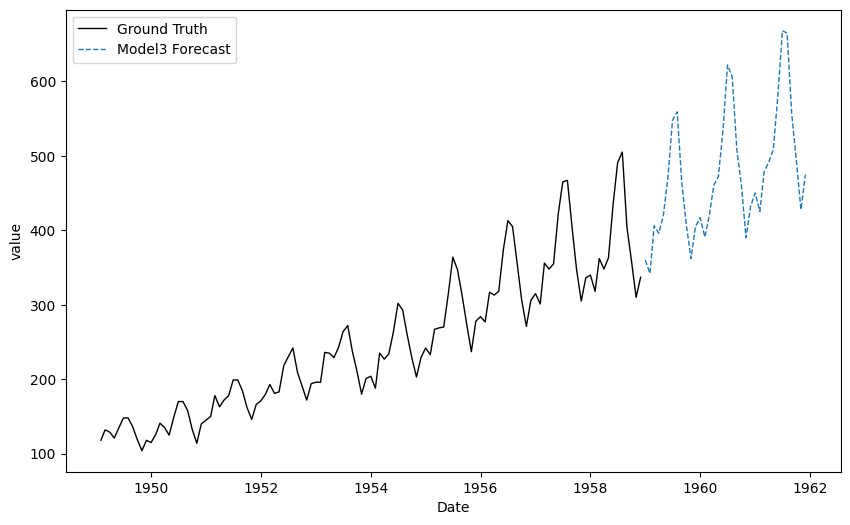

In [ ]:
forecasts_m1 = model_3.forecast(steps=12)
full_seasonal_diff = pd.concat([passengers_seasonal_differenced,forecasts_m1],axis=0)
real_scale_forecasts = passengers.to_dict()
indexer = full_seasonal_diff.index

for idx in np.where(indexer>= '1959-01')[0]:
  temp_val = full_seasonal_diff[idx] + np.log(real_scale_forecasts[indexer[idx-1]]) + np.log(real_scale_forecasts[indexer[idx-12]]) - np.log(real_scale_forecasts[indexer[idx-13]])
  real_scale_forecasts[indexer[idx]] = np.exp(temp_val)

real_scale_forecasts_dataframe = pd.DataFrame.from_dict(real_scale_forecasts,orient='index')
real_scale_forecasts_dataframe.columns = ['Ground Truth']
# Figure for M1
fig, ax1 = plt.subplots(figsize=(10, 6))
fitted = real_scale_forecasts_dataframe[(real_scale_forecasts_dataframe.index <'1959-01')*(real_scale_forecasts_dataframe.index >= '1949-02')]
predicted = real_scale_forecasts_dataframe[real_scale_forecasts_dataframe.index>= '1959-01']

color = 'black'
ax1.set_xlabel('Date')
ax1.set_ylabel('value', color=color)
ax1.plot(fitted, color=color, linewidth=1, label='Ground Truth')
ax1.plot(predicted, color='tab:blue', linewidth=1, linestyle='--',label='Model3 Forecast' )
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
plt.show()


Model 2,3,4의 그래프는 생략.

In [ ]:
# out-of-sample prediction with expanding rolling window.
checker = passengers_seasonal_differenced.index <= '1959-1'
# 2004년 4월 1일 이후는 out of sample
# (list(range(1,13)), 0, 0), (list(range(1,13)),0,[4,8,12]), ([1,12],0,[1,4,8,12])

train_set = passengers_seasonal_differenced[checker]
test_set = passengers_seasonal_differenced[~checker]
n_train = len(train_set)
n_test = len(test_set)
f1, f1_error = [], []
f2, f2_error = [], []
f3, f3_error = [], []
f4, f4_error = [], []
ground_truth = []

for i in range(n_test):
    crt_time = i + n_train
    x_train = passengers_seasonal_differenced[:crt_time]

    # iterate over the time series data, fitting the model on each expanding window of data
    model_1 = sm.tsa.statespace.SARIMAX(x_train, trend='c', order=([1, 3, 9, 12], 0, [1, 3, 9, 12])).fit()
    model_2 = sm.tsa.statespace.SARIMAX(x_train, trend='c', order=(1, 0, 0), seasonal_order=(1, 0, 0, 12)).fit()
    model_3 = sm.tsa.statespace.SARIMAX(x_train, trend='c', order=(0, 0, 1), seasonal_order=(0, 0, 1, 12)).fit()
    model_4 = sm.tsa.statespace.SARIMAX(x_train, trend='c', order=(1, 0, 1), seasonal_order=(1, 0, 1, 12)).fit()

    # one-step-ahead forecasts
    forecast_1 = model_1.forecast(steps=1)
    forecast_2 = model_2.forecast(steps=1)
    forecast_3 = model_3.forecast(steps=1)
    forecast_4 = model_4.forecast(steps=1)

    # true one-step-ahead value
    y = passengers_seasonal_differenced[crt_time]
    ground_truth.append(y)
    f1.append(forecast_1[0])
    f1_error.append(y - forecast_1[0])
    f2.append(forecast_2[0])
    f2_error.append(y - forecast_2[0])
    f3.append(forecast_3[0])
    f3_error.append(y - forecast_3[0])
    f4.append(forecast_4[0])
    f4_error.append(y - forecast_4[0])

In [ ]:
 # plot the results
plt.figure(figsize=(12,4))
plt.plot(ground_truth, label='ground truth', color='k', linestyle='--')
plt.plot(f1, label='f1 predicted', color='r')
plt.plot(f2, label='f2 predicted', color='b')
plt.plot(f3, label='f3 predicted', color='g')
plt.plot(f4, label='f4 predicted', color='y')
plt.legend()
plt.show()

In [ ]:
 # plot the results
plt.figure(figsize=(12,4))
plt.scatter(np.linspace(1,len(f1_error),len(f1_error)), f1_error, label='f1error', color='r')
plt.scatter(np.linspace(1,len(f2_error),len(f2_error)), f2_error, label='f2error', color='b')
plt.scatter(np.linspace(1,len(f3_error),len(f3_error)), f3_error, label='f3error', color='g')
plt.scatter(np.linspace(1,len(f4_error),len(f4_error)), f4_error, label='f4error', color='y')
plt.axhline(y=0, color='k', linestyle='--')
plt.legend()
plt.show()

In [ ]:
s_2000_3q = ground_truth[0]
f1_2000_3q = f1[0]
f2_2000_3q = f2[0]
f3_2000_3q = f3[0]
f4_2000_3q = f4[0]
f1 = pd.Series(f1)
f2 = pd.Series(f2)
f3 = pd.Series(f3)
f4 = pd.Series(f4)
f1_error = pd.Series(f1_error)
f2_error = pd.Series(f2_error)
f3_error = pd.Series(f3_error)
f4_error = pd.Series(f4_error)
print(f"Actual value:{round(s_2000_3q,3)}, f1 forecast:{round(f1_2000_3q,3)},f2 forecast:{round(f2_2000_3q,3)},f3 forecast:{round(f3_2000_3q,3)},f4 forecast:{round(f4_2000_3q,3)}")
print(f"avg f1:{round(np.array(f1).mean(),4)}, avg f2:{round(np.array(f2).mean(),4)},avg f3:{round(np.array(f3).mean(),4)},avg f4:{round(np.array(f4).mean(),4)}")
print(f"var of f1:{round(np.array(f1).var(),4)}, var of f2:{round(np.array(f2).var(),4)},var of f3:{round(np.array(f3).var(),4)},var of f4:{round(np.array(f4).var(),4)}")
print(f'mean squared prediction error of f1: {round((f1_error**2).mean(),4)},mean squared prediction error of f2: {round((f2_error**2).mean(),4)},mean squared prediction error of f3: {round((f3_error**2).mean(),4)},mean squared prediction error of f4: {round((f4_error**2).mean(),4)}')

In [ ]:
# Joint f-test for model 2
dta = pd.concat([pd.Series(f2,name='f2'), pd.Series(ground_truth,name='s')],axis=1)
dta.columns=['f2','s']
formula = 's ~ f2'
results = sm.OLS.from_formula(formula = formula, data = dta).fit()
hypotheses = '(Intercept = 0), (f2 = 1)'
f_test = results.f_test(hypotheses)
print(f_test)
print(results.params)

In [ ]:
# Joint f-test for model 3
dta = pd.concat([pd.Series(f3,name='f3'), pd.Series(ground_truth,name='s')],axis=1)
dta.columns=['f3','s']
formula = 's ~ f3'
results = sm.OLS.from_formula(formula = formula, data = dta).fit()
hypotheses = '(Intercept = 0), (f3 = 1)'
f_test = results.f_test(hypotheses)
print(f_test)
print(results.params)

In [ ]:
x_i = f3_error + f2_error
z_i = f3_error - f2_error
corr_xz = x_i.corr(z_i,method='pearson')
Granger_Newbold_stats = corr_xz/ np.sqrt( (1-corr_xz**2)/49 )
print(Granger_Newbold_stats)

In [ ]:
d = np.power(f3_error, 4) - np.power(f2_error, 4)
DM = np.mean(d) / np.power(np.var(d) / (len(d) - 1), 0.5)
print(DM)
acf_d = acf(d, nlags=12)[1:]
print(acf_d)

# ARMA모델에선 AR(12)/SARIMA모델에선 MA(1)가 가장 적합해보인다.

---

